# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

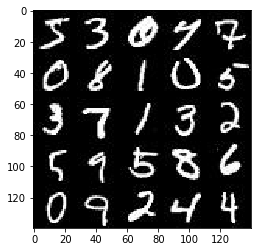

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

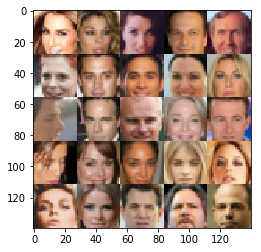

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.1


/Users/vsamel/anaconda2/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, shape=[], name='learning_rate')
    return inputs_real, inputs_z, learning_rate

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha = 0.2
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 512, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
   # TODO: Implement Function
    with tf.variable_scope('generator', reuse= not is_train):
        alpha = 0.2
        strt = 7
        st_filt = 512 
        # First fully connected layer
        x1 = tf.layers.dense(z, strt*strt*st_filt)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, strt, strt, st_filt))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)

        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)        
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)


        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same',kernel_initializer =tf.random_normal_initializer(stddev=0.05))

#        print(x1.shape)
#        print(x2.shape)
#        print(x3.shape)
#        print(logits.shape)        
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    d_out_real,d_logits_real = discriminator(input_real, False)
    g_model = generator(input_z, out_channel_dim)
    d_out_fake,d_logits_fake = discriminator(g_model, True)
    
    # Calculate losses
    smooth = 0.1

    d_loss_real = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                              labels=tf.ones_like(d_logits_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                              labels=tf.zeros_like(d_logits_real)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
                 tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                         labels=tf.ones_like(d_logits_fake)))    
    
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print (data_shape)
    if (data_image_mode == "RGB"):
        out_channel_dim=3
    else:
        out_channel_dim=1
    inputs_real, inputs_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    print (inputs_real.shape)
    print (inputs_z.shape)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, out_channel_dim)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    step = 0 
    print_every = 10
    show_every = 100
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                step += 1
                batch_images = batch_images * 2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z: batch_z, lr:learning_rate})
                
                if step % print_every == 0:
                    train_loss_d = d_loss.eval({inputs_z:batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z:batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g)) 

                if step % show_every == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

(60000, 28, 28, 1)
(?, 28, 28, 1)
(?, 128)
Epoch 1/2... Discriminator Loss: 2.4177... Generator Loss: 0.5372
Epoch 1/2... Discriminator Loss: 0.3682... Generator Loss: 5.1188
Epoch 1/2... Discriminator Loss: 0.6002... Generator Loss: 10.4923
Epoch 1/2... Discriminator Loss: 0.3495... Generator Loss: 7.3508
Epoch 1/2... Discriminator Loss: 0.7195... Generator Loss: 2.0642
Epoch 1/2... Discriminator Loss: 0.9259... Generator Loss: 3.7165
Epoch 1/2... Discriminator Loss: 2.0433... Generator Loss: 0.4998
Epoch 1/2... Discriminator Loss: 0.4931... Generator Loss: 2.7672
Epoch 1/2... Discriminator Loss: 0.5535... Generator Loss: 2.8050
Epoch 1/2... Discriminator Loss: 1.8507... Generator Loss: 2.4987


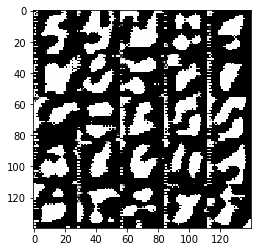

Epoch 1/2... Discriminator Loss: 1.7701... Generator Loss: 1.7575
Epoch 1/2... Discriminator Loss: 1.8457... Generator Loss: 0.5798
Epoch 1/2... Discriminator Loss: 0.8745... Generator Loss: 2.7409
Epoch 1/2... Discriminator Loss: 1.3094... Generator Loss: 0.8277
Epoch 1/2... Discriminator Loss: 1.2890... Generator Loss: 0.6879
Epoch 1/2... Discriminator Loss: 0.9380... Generator Loss: 1.2264
Epoch 1/2... Discriminator Loss: 1.2642... Generator Loss: 0.9197
Epoch 1/2... Discriminator Loss: 2.8887... Generator Loss: 0.1298
Epoch 1/2... Discriminator Loss: 1.8658... Generator Loss: 0.4617
Epoch 1/2... Discriminator Loss: 0.8217... Generator Loss: 1.2551


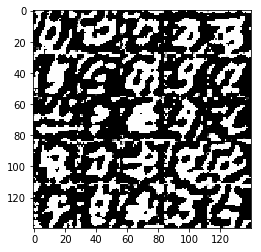

Epoch 1/2... Discriminator Loss: 1.2557... Generator Loss: 0.6612
Epoch 1/2... Discriminator Loss: 1.4687... Generator Loss: 0.5521
Epoch 1/2... Discriminator Loss: 1.0396... Generator Loss: 0.8190
Epoch 1/2... Discriminator Loss: 0.9815... Generator Loss: 1.1615
Epoch 1/2... Discriminator Loss: 0.7923... Generator Loss: 1.2899
Epoch 1/2... Discriminator Loss: 1.1221... Generator Loss: 0.7466
Epoch 1/2... Discriminator Loss: 1.4590... Generator Loss: 2.3894
Epoch 1/2... Discriminator Loss: 1.1429... Generator Loss: 2.1883
Epoch 1/2... Discriminator Loss: 1.3101... Generator Loss: 0.6741
Epoch 1/2... Discriminator Loss: 1.1732... Generator Loss: 0.7741


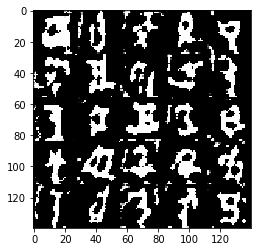

Epoch 1/2... Discriminator Loss: 0.9778... Generator Loss: 1.1187
Epoch 1/2... Discriminator Loss: 1.2430... Generator Loss: 1.1945
Epoch 1/2... Discriminator Loss: 1.1866... Generator Loss: 1.2181
Epoch 1/2... Discriminator Loss: 1.1399... Generator Loss: 0.8882
Epoch 1/2... Discriminator Loss: 1.0690... Generator Loss: 1.4646
Epoch 1/2... Discriminator Loss: 1.0944... Generator Loss: 0.9526
Epoch 1/2... Discriminator Loss: 1.3717... Generator Loss: 0.6146
Epoch 1/2... Discriminator Loss: 1.1660... Generator Loss: 1.1610
Epoch 1/2... Discriminator Loss: 1.2220... Generator Loss: 0.8935
Epoch 1/2... Discriminator Loss: 1.4517... Generator Loss: 0.6339


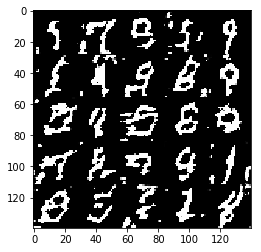

Epoch 1/2... Discriminator Loss: 1.1382... Generator Loss: 0.9675
Epoch 1/2... Discriminator Loss: 1.2811... Generator Loss: 0.6389
Epoch 1/2... Discriminator Loss: 1.1656... Generator Loss: 1.0353
Epoch 1/2... Discriminator Loss: 1.2326... Generator Loss: 0.9806
Epoch 1/2... Discriminator Loss: 1.1097... Generator Loss: 0.9909
Epoch 1/2... Discriminator Loss: 1.1789... Generator Loss: 1.0926
Epoch 1/2... Discriminator Loss: 1.1917... Generator Loss: 0.8307
Epoch 1/2... Discriminator Loss: 1.0803... Generator Loss: 1.0957
Epoch 1/2... Discriminator Loss: 1.1921... Generator Loss: 1.5825
Epoch 1/2... Discriminator Loss: 1.4913... Generator Loss: 0.7223


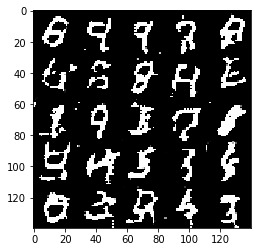

Epoch 1/2... Discriminator Loss: 1.1952... Generator Loss: 1.2633
Epoch 1/2... Discriminator Loss: 1.4353... Generator Loss: 0.4891
Epoch 1/2... Discriminator Loss: 1.1295... Generator Loss: 1.5999
Epoch 1/2... Discriminator Loss: 1.1665... Generator Loss: 1.0239
Epoch 1/2... Discriminator Loss: 1.1261... Generator Loss: 0.9289
Epoch 1/2... Discriminator Loss: 1.1608... Generator Loss: 0.9286
Epoch 1/2... Discriminator Loss: 1.8368... Generator Loss: 0.3361
Epoch 1/2... Discriminator Loss: 1.1804... Generator Loss: 0.8541
Epoch 1/2... Discriminator Loss: 1.2443... Generator Loss: 0.6698
Epoch 1/2... Discriminator Loss: 1.0639... Generator Loss: 1.0762


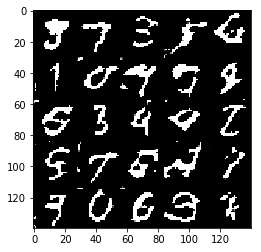

Epoch 1/2... Discriminator Loss: 1.1343... Generator Loss: 0.9205
Epoch 1/2... Discriminator Loss: 1.0568... Generator Loss: 1.0540
Epoch 1/2... Discriminator Loss: 1.1787... Generator Loss: 0.9949
Epoch 1/2... Discriminator Loss: 1.1099... Generator Loss: 0.8628
Epoch 1/2... Discriminator Loss: 1.2539... Generator Loss: 1.0433
Epoch 1/2... Discriminator Loss: 2.0501... Generator Loss: 0.3064
Epoch 1/2... Discriminator Loss: 1.1939... Generator Loss: 0.7268
Epoch 1/2... Discriminator Loss: 1.3236... Generator Loss: 1.0254
Epoch 1/2... Discriminator Loss: 1.0859... Generator Loss: 1.1202
Epoch 1/2... Discriminator Loss: 1.1833... Generator Loss: 1.0022


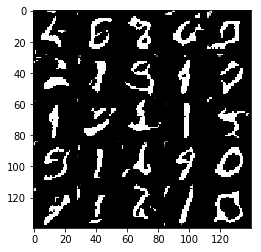

Epoch 1/2... Discriminator Loss: 1.2639... Generator Loss: 1.2914
Epoch 1/2... Discriminator Loss: 1.2975... Generator Loss: 0.9522
Epoch 1/2... Discriminator Loss: 1.0335... Generator Loss: 1.2039
Epoch 1/2... Discriminator Loss: 1.0777... Generator Loss: 1.3643
Epoch 1/2... Discriminator Loss: 1.5129... Generator Loss: 1.2941
Epoch 1/2... Discriminator Loss: 1.4204... Generator Loss: 0.5089
Epoch 1/2... Discriminator Loss: 1.1527... Generator Loss: 0.8879
Epoch 1/2... Discriminator Loss: 1.4652... Generator Loss: 0.6555
Epoch 1/2... Discriminator Loss: 1.2333... Generator Loss: 0.8007
Epoch 1/2... Discriminator Loss: 1.3462... Generator Loss: 0.7540


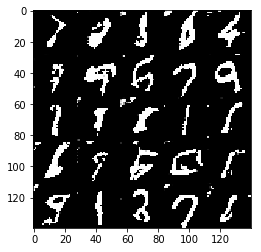

Epoch 1/2... Discriminator Loss: 1.0924... Generator Loss: 1.0330
Epoch 1/2... Discriminator Loss: 1.0670... Generator Loss: 1.0414
Epoch 1/2... Discriminator Loss: 1.4365... Generator Loss: 0.5744
Epoch 1/2... Discriminator Loss: 0.8152... Generator Loss: 1.4884
Epoch 1/2... Discriminator Loss: 0.9677... Generator Loss: 1.3676
Epoch 1/2... Discriminator Loss: 1.5020... Generator Loss: 0.5601
Epoch 1/2... Discriminator Loss: 1.2451... Generator Loss: 0.8009
Epoch 1/2... Discriminator Loss: 1.0269... Generator Loss: 1.0093
Epoch 1/2... Discriminator Loss: 1.2427... Generator Loss: 0.8031
Epoch 1/2... Discriminator Loss: 1.1160... Generator Loss: 0.8782


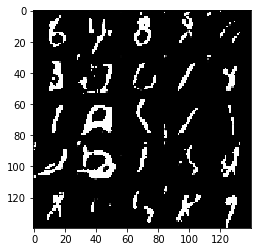

Epoch 1/2... Discriminator Loss: 1.2854... Generator Loss: 0.7448
Epoch 1/2... Discriminator Loss: 1.3536... Generator Loss: 1.8984
Epoch 1/2... Discriminator Loss: 1.2161... Generator Loss: 0.7525
Epoch 2/2... Discriminator Loss: 1.3312... Generator Loss: 0.6071
Epoch 2/2... Discriminator Loss: 1.0603... Generator Loss: 1.0594
Epoch 2/2... Discriminator Loss: 1.4759... Generator Loss: 0.4990
Epoch 2/2... Discriminator Loss: 1.4818... Generator Loss: 0.5137
Epoch 2/2... Discriminator Loss: 1.2543... Generator Loss: 1.3078
Epoch 2/2... Discriminator Loss: 1.1496... Generator Loss: 1.0212
Epoch 2/2... Discriminator Loss: 1.3091... Generator Loss: 1.7984


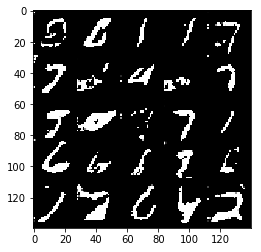

Epoch 2/2... Discriminator Loss: 0.9938... Generator Loss: 1.0197
Epoch 2/2... Discriminator Loss: 0.9565... Generator Loss: 1.3129
Epoch 2/2... Discriminator Loss: 2.0516... Generator Loss: 0.2703
Epoch 2/2... Discriminator Loss: 1.4161... Generator Loss: 0.6621
Epoch 2/2... Discriminator Loss: 1.1155... Generator Loss: 1.0122
Epoch 2/2... Discriminator Loss: 1.4490... Generator Loss: 0.5937
Epoch 2/2... Discriminator Loss: 1.2614... Generator Loss: 0.7479
Epoch 2/2... Discriminator Loss: 1.1678... Generator Loss: 0.9733
Epoch 2/2... Discriminator Loss: 1.3152... Generator Loss: 2.2188
Epoch 2/2... Discriminator Loss: 1.6389... Generator Loss: 0.3945


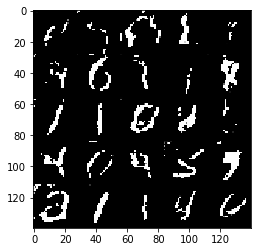

Epoch 2/2... Discriminator Loss: 1.0903... Generator Loss: 0.9219
Epoch 2/2... Discriminator Loss: 1.1155... Generator Loss: 0.9554
Epoch 2/2... Discriminator Loss: 1.1044... Generator Loss: 1.5245
Epoch 2/2... Discriminator Loss: 1.0338... Generator Loss: 1.3640
Epoch 2/2... Discriminator Loss: 1.1432... Generator Loss: 0.9387
Epoch 2/2... Discriminator Loss: 1.1334... Generator Loss: 0.8034
Epoch 2/2... Discriminator Loss: 0.9662... Generator Loss: 1.2102
Epoch 2/2... Discriminator Loss: 1.1178... Generator Loss: 0.8995
Epoch 2/2... Discriminator Loss: 1.4727... Generator Loss: 0.6116
Epoch 2/2... Discriminator Loss: 1.2160... Generator Loss: 0.7798


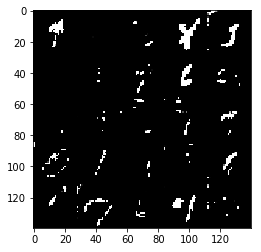

Epoch 2/2... Discriminator Loss: 1.0289... Generator Loss: 1.1512
Epoch 2/2... Discriminator Loss: 1.2587... Generator Loss: 1.6699
Epoch 2/2... Discriminator Loss: 1.3163... Generator Loss: 0.7084
Epoch 2/2... Discriminator Loss: 1.0172... Generator Loss: 1.0746
Epoch 2/2... Discriminator Loss: 1.1869... Generator Loss: 1.4439
Epoch 2/2... Discriminator Loss: 1.3092... Generator Loss: 0.7267
Epoch 2/2... Discriminator Loss: 1.2509... Generator Loss: 0.7191
Epoch 2/2... Discriminator Loss: 1.0674... Generator Loss: 1.0042
Epoch 2/2... Discriminator Loss: 2.1263... Generator Loss: 0.3031
Epoch 2/2... Discriminator Loss: 1.1397... Generator Loss: 1.6844


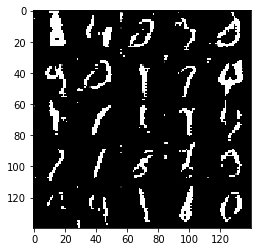

Epoch 2/2... Discriminator Loss: 1.1016... Generator Loss: 0.8703
Epoch 2/2... Discriminator Loss: 1.2620... Generator Loss: 1.1677
Epoch 2/2... Discriminator Loss: 1.3119... Generator Loss: 1.7612
Epoch 2/2... Discriminator Loss: 1.5829... Generator Loss: 0.4806
Epoch 2/2... Discriminator Loss: 1.3151... Generator Loss: 0.8565
Epoch 2/2... Discriminator Loss: 1.2039... Generator Loss: 1.5338
Epoch 2/2... Discriminator Loss: 1.0665... Generator Loss: 2.0120
Epoch 2/2... Discriminator Loss: 0.8802... Generator Loss: 1.3773
Epoch 2/2... Discriminator Loss: 0.9880... Generator Loss: 1.4641
Epoch 2/2... Discriminator Loss: 1.1352... Generator Loss: 1.2333


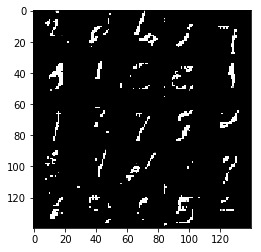

Epoch 2/2... Discriminator Loss: 1.1132... Generator Loss: 0.8541
Epoch 2/2... Discriminator Loss: 1.6352... Generator Loss: 0.4345
Epoch 2/2... Discriminator Loss: 1.1716... Generator Loss: 0.8580
Epoch 2/2... Discriminator Loss: 1.2494... Generator Loss: 0.7190
Epoch 2/2... Discriminator Loss: 1.4028... Generator Loss: 0.6909
Epoch 2/2... Discriminator Loss: 1.0059... Generator Loss: 1.0854
Epoch 2/2... Discriminator Loss: 1.1601... Generator Loss: 0.9247
Epoch 2/2... Discriminator Loss: 0.9993... Generator Loss: 1.0201
Epoch 2/2... Discriminator Loss: 1.3386... Generator Loss: 0.6310
Epoch 2/2... Discriminator Loss: 1.0245... Generator Loss: 0.9241


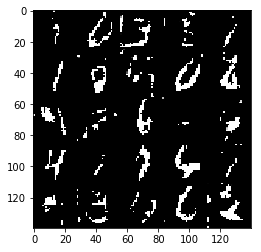

Epoch 2/2... Discriminator Loss: 1.2141... Generator Loss: 2.2483
Epoch 2/2... Discriminator Loss: 1.2110... Generator Loss: 1.7005
Epoch 2/2... Discriminator Loss: 0.9389... Generator Loss: 1.1152
Epoch 2/2... Discriminator Loss: 0.8799... Generator Loss: 1.2188
Epoch 2/2... Discriminator Loss: 1.2439... Generator Loss: 0.7818
Epoch 2/2... Discriminator Loss: 1.3920... Generator Loss: 2.0660
Epoch 2/2... Discriminator Loss: 1.3616... Generator Loss: 0.6713
Epoch 2/2... Discriminator Loss: 0.9259... Generator Loss: 1.5747
Epoch 2/2... Discriminator Loss: 1.4866... Generator Loss: 0.5221
Epoch 2/2... Discriminator Loss: 1.0680... Generator Loss: 1.2502


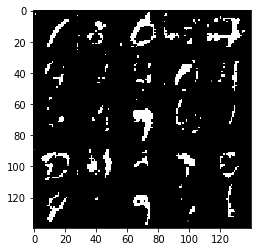

Epoch 2/2... Discriminator Loss: 1.2017... Generator Loss: 0.7925
Epoch 2/2... Discriminator Loss: 1.9171... Generator Loss: 3.3358
Epoch 2/2... Discriminator Loss: 0.9883... Generator Loss: 1.3834
Epoch 2/2... Discriminator Loss: 1.1231... Generator Loss: 0.8519
Epoch 2/2... Discriminator Loss: 1.1577... Generator Loss: 0.7214
Epoch 2/2... Discriminator Loss: 1.0273... Generator Loss: 1.0235
Epoch 2/2... Discriminator Loss: 1.2096... Generator Loss: 0.7596
Epoch 2/2... Discriminator Loss: 1.0631... Generator Loss: 2.0203
Epoch 2/2... Discriminator Loss: 1.0724... Generator Loss: 0.8225
Epoch 2/2... Discriminator Loss: 1.1911... Generator Loss: 0.9423


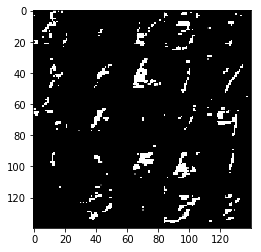

Epoch 2/2... Discriminator Loss: 1.0741... Generator Loss: 1.2285
Epoch 2/2... Discriminator Loss: 1.2730... Generator Loss: 0.8247
Epoch 2/2... Discriminator Loss: 1.1567... Generator Loss: 0.8908
Epoch 2/2... Discriminator Loss: 1.0112... Generator Loss: 0.9867
Epoch 2/2... Discriminator Loss: 1.1103... Generator Loss: 1.4877
Epoch 2/2... Discriminator Loss: 0.8619... Generator Loss: 1.4795
Epoch 2/2... Discriminator Loss: 1.0895... Generator Loss: 0.9124
Epoch 2/2... Discriminator Loss: 1.9823... Generator Loss: 0.3851
Epoch 2/2... Discriminator Loss: 0.9076... Generator Loss: 1.1249
Epoch 2/2... Discriminator Loss: 1.8016... Generator Loss: 0.7841


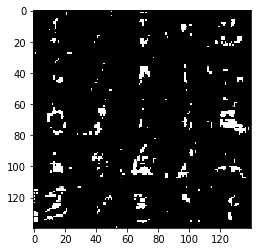

Epoch 2/2... Discriminator Loss: 1.8163... Generator Loss: 0.4349
Epoch 2/2... Discriminator Loss: 1.2669... Generator Loss: 0.6906
Epoch 2/2... Discriminator Loss: 1.1445... Generator Loss: 1.0016
Epoch 2/2... Discriminator Loss: 1.2147... Generator Loss: 0.8558
Epoch 2/2... Discriminator Loss: 0.9000... Generator Loss: 1.3112
Epoch 2/2... Discriminator Loss: 1.1725... Generator Loss: 1.2601
Epoch 2/2... Discriminator Loss: 0.9643... Generator Loss: 1.0259


In [12]:
batch_size = 64
z_dim = 128
learning_rate = 0.005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

(202599, 28, 28, 3)
(?, 28, 28, 3)
(?, 100)
Epoch 1/1... Discriminator Loss: 2.2512... Generator Loss: 0.1989
Epoch 1/1... Discriminator Loss: 2.1502... Generator Loss: 0.2256
Epoch 1/1... Discriminator Loss: 1.6174... Generator Loss: 3.7901
Epoch 1/1... Discriminator Loss: 2.2673... Generator Loss: 0.1974
Epoch 1/1... Discriminator Loss: 1.1159... Generator Loss: 0.9623
Epoch 1/1... Discriminator Loss: 1.5796... Generator Loss: 0.4192
Epoch 1/1... Discriminator Loss: 1.2308... Generator Loss: 0.7052
Epoch 1/1... Discriminator Loss: 0.8096... Generator Loss: 1.2106
Epoch 1/1... Discriminator Loss: 1.8036... Generator Loss: 0.3314
Epoch 1/1... Discriminator Loss: 1.6132... Generator Loss: 0.3969


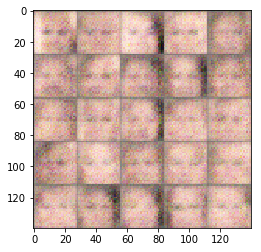

Epoch 1/1... Discriminator Loss: 1.7049... Generator Loss: 0.3673
Epoch 1/1... Discriminator Loss: 1.3692... Generator Loss: 0.6000
Epoch 1/1... Discriminator Loss: 1.1697... Generator Loss: 0.6615
Epoch 1/1... Discriminator Loss: 1.2247... Generator Loss: 0.6845
Epoch 1/1... Discriminator Loss: 0.9695... Generator Loss: 0.9872
Epoch 1/1... Discriminator Loss: 1.4225... Generator Loss: 0.5076
Epoch 1/1... Discriminator Loss: 1.6926... Generator Loss: 0.3477
Epoch 1/1... Discriminator Loss: 1.6136... Generator Loss: 0.3827
Epoch 1/1... Discriminator Loss: 1.4219... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.3574... Generator Loss: 0.5257


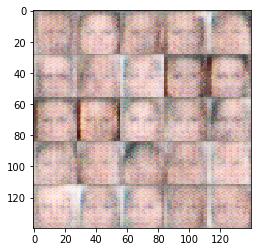

Epoch 1/1... Discriminator Loss: 1.0791... Generator Loss: 0.7539
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.5609
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.5297
Epoch 1/1... Discriminator Loss: 1.6231... Generator Loss: 0.3619
Epoch 1/1... Discriminator Loss: 1.5347... Generator Loss: 0.4062
Epoch 1/1... Discriminator Loss: 1.5478... Generator Loss: 0.3883
Epoch 1/1... Discriminator Loss: 1.7180... Generator Loss: 0.3596
Epoch 1/1... Discriminator Loss: 0.6500... Generator Loss: 1.5149
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.5467
Epoch 1/1... Discriminator Loss: 0.5774... Generator Loss: 3.3358


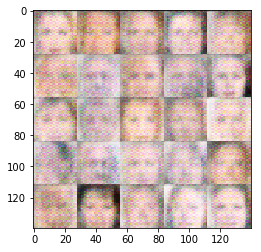

Epoch 1/1... Discriminator Loss: 1.0978... Generator Loss: 4.5916
Epoch 1/1... Discriminator Loss: 0.4315... Generator Loss: 2.8140
Epoch 1/1... Discriminator Loss: 0.9863... Generator Loss: 3.5457
Epoch 1/1... Discriminator Loss: 1.2606... Generator Loss: 0.5641
Epoch 1/1... Discriminator Loss: 0.4938... Generator Loss: 3.5199
Epoch 1/1... Discriminator Loss: 1.2645... Generator Loss: 4.2857
Epoch 1/1... Discriminator Loss: 0.4450... Generator Loss: 3.2050
Epoch 1/1... Discriminator Loss: 0.4826... Generator Loss: 2.3185
Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.5249
Epoch 1/1... Discriminator Loss: 1.8809... Generator Loss: 0.2875


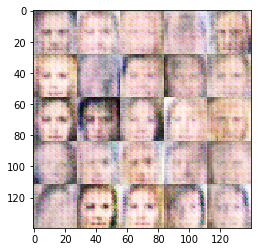

Epoch 1/1... Discriminator Loss: 0.7938... Generator Loss: 4.4800
Epoch 1/1... Discriminator Loss: 1.4743... Generator Loss: 2.6844
Epoch 1/1... Discriminator Loss: 1.5177... Generator Loss: 0.4165
Epoch 1/1... Discriminator Loss: 1.5420... Generator Loss: 0.4113
Epoch 1/1... Discriminator Loss: 1.4994... Generator Loss: 0.4302
Epoch 1/1... Discriminator Loss: 1.9936... Generator Loss: 0.2413
Epoch 1/1... Discriminator Loss: 2.3144... Generator Loss: 0.1725
Epoch 1/1... Discriminator Loss: 1.8442... Generator Loss: 0.2809
Epoch 1/1... Discriminator Loss: 1.9246... Generator Loss: 0.2646
Epoch 1/1... Discriminator Loss: 0.8398... Generator Loss: 1.1956


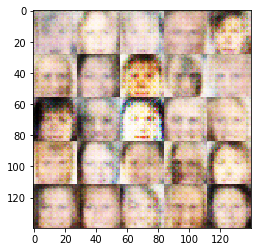

Epoch 1/1... Discriminator Loss: 1.9464... Generator Loss: 0.2642
Epoch 1/1... Discriminator Loss: 0.7101... Generator Loss: 1.4187
Epoch 1/1... Discriminator Loss: 0.5670... Generator Loss: 2.6310
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.9428
Epoch 1/1... Discriminator Loss: 0.6960... Generator Loss: 4.2509
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 1.7252
Epoch 1/1... Discriminator Loss: 0.7067... Generator Loss: 1.4264
Epoch 1/1... Discriminator Loss: 1.1799... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 0.5277... Generator Loss: 3.3036
Epoch 1/1... Discriminator Loss: 1.7285... Generator Loss: 3.3786


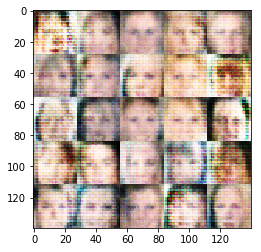

Epoch 1/1... Discriminator Loss: 1.0371... Generator Loss: 4.7671
Epoch 1/1... Discriminator Loss: 2.1976... Generator Loss: 1.9924
Epoch 1/1... Discriminator Loss: 0.9872... Generator Loss: 4.2276
Epoch 1/1... Discriminator Loss: 0.7858... Generator Loss: 1.1832
Epoch 1/1... Discriminator Loss: 1.9377... Generator Loss: 0.2608
Epoch 1/1... Discriminator Loss: 0.5323... Generator Loss: 2.4143
Epoch 1/1... Discriminator Loss: 0.8718... Generator Loss: 4.8323
Epoch 1/1... Discriminator Loss: 0.9302... Generator Loss: 0.9114
Epoch 1/1... Discriminator Loss: 1.7578... Generator Loss: 0.3024
Epoch 1/1... Discriminator Loss: 0.7855... Generator Loss: 1.1913


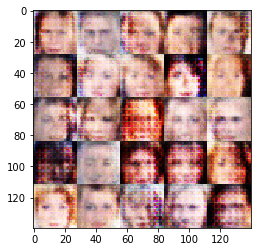

Epoch 1/1... Discriminator Loss: 0.6848... Generator Loss: 1.8694
Epoch 1/1... Discriminator Loss: 0.5438... Generator Loss: 3.2654
Epoch 1/1... Discriminator Loss: 1.2714... Generator Loss: 0.5513
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.4756
Epoch 1/1... Discriminator Loss: 0.7347... Generator Loss: 1.4479
Epoch 1/1... Discriminator Loss: 1.0570... Generator Loss: 0.7437
Epoch 1/1... Discriminator Loss: 0.8019... Generator Loss: 1.0981
Epoch 1/1... Discriminator Loss: 0.5440... Generator Loss: 2.6884
Epoch 1/1... Discriminator Loss: 0.9860... Generator Loss: 0.8048
Epoch 1/1... Discriminator Loss: 0.4983... Generator Loss: 3.4415


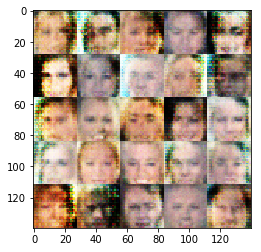

Epoch 1/1... Discriminator Loss: 0.5141... Generator Loss: 2.1023
Epoch 1/1... Discriminator Loss: 1.2977... Generator Loss: 0.5780
Epoch 1/1... Discriminator Loss: 0.6785... Generator Loss: 1.5775
Epoch 1/1... Discriminator Loss: 2.0044... Generator Loss: 1.6019
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 2.6786
Epoch 1/1... Discriminator Loss: 1.1841... Generator Loss: 0.8907
Epoch 1/1... Discriminator Loss: 0.6649... Generator Loss: 1.5784
Epoch 1/1... Discriminator Loss: 1.0215... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 0.8271... Generator Loss: 1.0873
Epoch 1/1... Discriminator Loss: 0.8396... Generator Loss: 1.2518


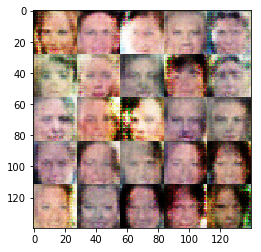

Epoch 1/1... Discriminator Loss: 1.2437... Generator Loss: 0.7950
Epoch 1/1... Discriminator Loss: 0.7095... Generator Loss: 2.2208
Epoch 1/1... Discriminator Loss: 1.6943... Generator Loss: 1.3442
Epoch 1/1... Discriminator Loss: 0.8611... Generator Loss: 3.6344
Epoch 1/1... Discriminator Loss: 0.6678... Generator Loss: 2.2282
Epoch 1/1... Discriminator Loss: 0.5858... Generator Loss: 2.1016
Epoch 1/1... Discriminator Loss: 0.5368... Generator Loss: 2.1050
Epoch 1/1... Discriminator Loss: 0.8230... Generator Loss: 1.0290
Epoch 1/1... Discriminator Loss: 1.4396... Generator Loss: 0.4632
Epoch 1/1... Discriminator Loss: 0.5263... Generator Loss: 2.0345


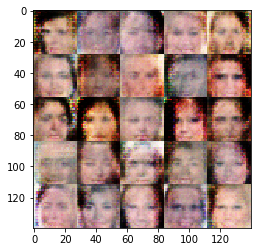

Epoch 1/1... Discriminator Loss: 0.5353... Generator Loss: 2.0241
Epoch 1/1... Discriminator Loss: 1.9879... Generator Loss: 0.2816
Epoch 1/1... Discriminator Loss: 1.2209... Generator Loss: 0.6141
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 0.8266... Generator Loss: 1.1393
Epoch 1/1... Discriminator Loss: 0.5778... Generator Loss: 2.2252


KeyboardInterrupt: 

In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.